# Foundations of Artificial Intelligence and Machine Learning
## A Program by IIIT-H and TalentSprint
#### To be done in the Lab


In this experiment, we explore how k-Means clustering is able to find patterns and produce groupings without any form of external information to help.

We take the text of the famous Russian novel "War and Peace" by Leo Tolstoy, downloaded from Project Gutenburg (http://www.gutenberg.org/), and extract all sentences from it. 

We will be performing following actions :
1. Use the nltk library to break the text into sentences. 
2. Build a word2vec representation using these sentences, after removing fluff words from these sentences.
3. Build a k-means algorithm on top of the data.

To run the experiment execute the following commands



1.!pip3 install gensim

2.!pip3 install nltk

3.import nltk

4.nltk.download('punkt')


In [1]:
# Importing required packages
import gensim
from gensim.models import Word2Vec
from gensim.models import word2vec
from gensim.models import Phrases
import logging

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
dataset = "AIML_DS_WAR-And-PEACE_STD.txt"


Now let us  read the entire file into a list of lines, converting everything to lowercase as well as remove trailing and leading whitespace.

In [4]:
wp_text_stage0 = [line.strip().lower() for line in open(dataset,encoding="utf8")]
print(wp_text_stage0[4000:4010])

['“you must look for husbands for them whether you like it or not....”', '', '“well,” said she, “how’s my cossack?” (márya dmítrievna', 'always called natásha a cossack) and she stroked the child’s arm as', 'she came up fearless and gay to kiss her hand. “i know she’s a scamp', 'of a girl, but i like her.”', '', 'she took a pair of pear-shaped ruby earrings from her huge reticule and,', 'having given them to the rosy natásha, who beamed with the pleasure', 'of her saint’s-day fete, turned away at once and addressed herself to']


Now we will combine them into one gigantic string

In [5]:
wp_text_stage1 = ' '.join(wp_text_stage0)

In [6]:
print(len(wp_text_stage1))
print(wp_text_stage1[40000:40200])

3224829
rove my devotion to you and how i respect your father’s memory, i will do the impossible—your son shall be transferred to the guards. here is my hand on it. are you satisfied?”  “my dear benefactor! t


We have gigantic string with us. let us see how to break this string into sentences

In [7]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
wp_text_stage2 = sent_tokenize(wp_text_stage1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anuryadav\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [8]:
print(len(wp_text_stage2))
print(wp_text_stage2[5000:5010])

26313
['after tea, the company went into the sitting room and princess mary was asked to play on the clavichord.', 'anatole, laughing and in high spirits, came and leaned on his elbows, facing her and beside mademoiselle bourienne.', 'princess mary felt his look with a painfully joyous emotion.', 'her favorite sonata bore her into a most intimately poetic world and the look she felt upon her made that world still more poetic.', 'but anatole’s expression, though his eyes were fixed on her, referred not to her but to the movements of mademoiselle bourienne’s little foot, which he was then touching with his own under the clavichord.', 'mademoiselle bourienne was also looking at princess mary, and in her lovely eyes there was a look of fearful joy and hope that was also new to the princess.', '“how she loves me!” thought princess mary.', '“how happy i am now, and how happy i may be with such a friend and such a husband!', 'husband?', 'can it be possible?” she thought, not daring to look at

So we have about 26k sentences, in the tome. We now take each sentence and clean it up as below:
 * replace all non-alphanumeric characters by space
 * split each sentence on whitespace
 * in each sentence drop words that are less than 3 letters long and are part of fluff words

We read the entire contents the fluff file into a set. As mentioned earlier a set is much faster for checking membership

In [9]:
fluff = set([line.strip() for line in open("AIML_DS_STOPWORDS_STD.txt")])

Replacing all non-alphanumeric characters by space

In [10]:
import re
only_alnum = re.compile(r"[^\w]+") ## \w => unicode alphabet
#only_alnum = re.compile(r"[^a-z0-9]") --> This will remove accented characters which are part of many names!

## Replaces one or more occurrence of any characters other unicode alphabets and numbers
def cleanUp(s):
    return re.sub(only_alnum, " ", s).strip()
wp_text_stage3 = [cleanUp(s) for s in wp_text_stage2]
print(wp_text_stage3[4000:4010])

['the whole air reeked with smoke', 'the excited faces of the soldiers were blackened with it', 'some were using their ramrods others putting powder on the touchpans or taking charges from their pouches while others were firing though who they were firing at could not be seen for the smoke which there was no wind to carry away', 'a pleasant humming and whistling of bullets were often heard', 'what is this thought prince andrew approaching the crowd of soldiers', 'it can t be an attack for they are not moving it can t be a square for they are not drawn up for that the commander of the regiment a thin feeble looking old man with a pleasant smile his eyelids drooping more than half over his old eyes giving him a mild expression rode up to bagratión and welcomed him as a host welcomes an honored guest', 'he reported that his regiment had been attacked by french cavalry and that though the attack had been repulsed he had lost more than half his men', 'he said the attack had been repulsed em

Now we break each sentence into words, and store these words as a list. We traverse this list and drop the unwanted words. 

In [11]:
def choose_words(s):
    return [w for w in s.split() if len(w) > 2 and w not in fluff]

In [12]:
wp_text_stage4 = [choose_words(sentence) for sentence in wp_text_stage3]
print(wp_text_stage4[4000:4010])

[['air', 'reeked', 'smoke'], ['excited', 'soldiers', 'blackened'], ['using', 'ramrods', 'putting', 'powder', 'touchpans', 'taking', 'charges', 'pouches', 'firing', 'firing', 'seen', 'smoke', 'wind', 'carry'], ['pleasant', 'humming', 'whistling', 'bullets', 'heard'], ['prince', 'andrew', 'approaching', 'crowd', 'soldiers'], ['attack', 'moving', 'square', 'drawn', 'commander', 'regiment', 'thin', 'feeble', 'looking', 'pleasant', 'smile', 'eyelids', 'drooping', 'half', 'eyes', 'giving', 'mild', 'expression', 'rode', 'bagratión', 'welcomed', 'host', 'welcomes', 'honored', 'guest'], ['reported', 'regiment', 'attacked', 'french', 'cavalry', 'attack', 'repulsed', 'lost', 'half'], ['attack', 'repulsed', 'employing', 'military', 'term', 'describe', 'occurred', 'regiment', 'reality', 'happened', 'half', 'hour', 'troops', 'entrusted', 'certainty', 'attack', 'repulsed', 'regiment', 'broken'], ['commencement', 'action', 'balls', 'shells', 'flying', 'regiment', 'hitting', 'afterwards', 'shouted', 'c

In [13]:
print(len(wp_text_stage4))

26313


We convert the words to common stem -- that is we do not want to consider "run", "runs", "running" as separate words

In [14]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
print(stemmer.stem("running"), stemmer.stem("run"), stemmer.stem("runs"), stemmer.stem("runner"))
print(stemmer.stem("guns"), stemmer.stem("gun"), stemmer.stem("gunned"), stemmer.stem("gunning"))

run run run runner
gun gun gun gun


In [15]:
def stem_list(wordlist):
    return [stemmer.stem(word) for word in wordlist]
for n in range(4000, 4010):
    print(wp_text_stage4[n], stem_list(wp_text_stage4[n]))

['air', 'reeked', 'smoke'] ['air', 'reek', 'smoke']
['excited', 'soldiers', 'blackened'] ['excit', 'soldier', 'blacken']
['using', 'ramrods', 'putting', 'powder', 'touchpans', 'taking', 'charges', 'pouches', 'firing', 'firing', 'seen', 'smoke', 'wind', 'carry'] ['use', 'ramrod', 'put', 'powder', 'touchpan', 'take', 'charg', 'pouch', 'fire', 'fire', 'seen', 'smoke', 'wind', 'carri']
['pleasant', 'humming', 'whistling', 'bullets', 'heard'] ['pleasant', 'hum', 'whistl', 'bullet', 'heard']
['prince', 'andrew', 'approaching', 'crowd', 'soldiers'] ['princ', 'andrew', 'approach', 'crowd', 'soldier']
['attack', 'moving', 'square', 'drawn', 'commander', 'regiment', 'thin', 'feeble', 'looking', 'pleasant', 'smile', 'eyelids', 'drooping', 'half', 'eyes', 'giving', 'mild', 'expression', 'rode', 'bagratión', 'welcomed', 'host', 'welcomes', 'honored', 'guest'] ['attack', 'move', 'squar', 'drawn', 'command', 'regiment', 'thin', 'feebl', 'look', 'pleasant', 'smile', 'eyelid', 'droop', 'half', 'eye', '

In [16]:
wp_text_stage5 = [stem_list(s) for s in wp_text_stage4]
print(wp_text_stage5[4000:4010])

[['air', 'reek', 'smoke'], ['excit', 'soldier', 'blacken'], ['use', 'ramrod', 'put', 'powder', 'touchpan', 'take', 'charg', 'pouch', 'fire', 'fire', 'seen', 'smoke', 'wind', 'carri'], ['pleasant', 'hum', 'whistl', 'bullet', 'heard'], ['princ', 'andrew', 'approach', 'crowd', 'soldier'], ['attack', 'move', 'squar', 'drawn', 'command', 'regiment', 'thin', 'feebl', 'look', 'pleasant', 'smile', 'eyelid', 'droop', 'half', 'eye', 'give', 'mild', 'express', 'rode', 'bagratión', 'welcom', 'host', 'welcom', 'honor', 'guest'], ['report', 'regiment', 'attack', 'french', 'cavalri', 'attack', 'repuls', 'lost', 'half'], ['attack', 'repuls', 'employ', 'militari', 'term', 'describ', 'occur', 'regiment', 'realiti', 'happen', 'half', 'hour', 'troop', 'entrust', 'certainti', 'attack', 'repuls', 'regiment', 'broken'], ['commenc', 'action', 'ball', 'shell', 'fli', 'regiment', 'hit', 'afterward', 'shout', 'cavalri', 'begun', 'fire'], ['fire', 'cavalri', 'disappear', 'french', 'infantri', 'hollow', 'fire']]


Now let us build a word2vec model with this corpus.

In [17]:
num_features = 300    # Word vector dimensionality                      
min_word_count = 50   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 6           # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

In [18]:
wp = word2vec.Word2Vec(wp_text_stage5, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

In [19]:
wp.init_sims(replace=True)

In [20]:
wp.corpus_count

26313

In [21]:
len(wp.wv.vocab.keys())

957

In [22]:
sorted(list(wp.wv.vocab))

['1812',
 'abandon',
 'abl',
 'accept',
 'accompani',
 'accord',
 'account',
 'acquaint',
 'act',
 'action',
 'activ',
 'ad',
 'address',
 'adjut',
 'admit',
 'advanc',
 'advantag',
 'affair',
 'affect',
 'afraid',
 'age',
 'agit',
 'ago',
 'agre',
 'aid',
 'aim',
 'air',
 'alexand',
 'allow',
 'alpátych',
 'amid',
 'amus',
 'anatol',
 'andrew',
 'angri',
 'angrili',
 'anim',
 'anna',
 'announc',
 'answer',
 'anxious',
 'apart',
 'appar',
 'appear',
 'appoint',
 'approach',
 'approv',
 'arm',
 'armi',
 'arrang',
 'arriv',
 'artilleri',
 'asham',
 'asid',
 'asleep',
 'assum',
 'assur',
 'attack',
 'attend',
 'attent',
 'attract',
 'austerlitz',
 'austrian',
 'author',
 'avoid',
 'await',
 'awkward',
 'bad',
 'bagratión',
 'balashëv',
 'bald',
 'ball',
 'barclay',
 'bare',
 'battalion',
 'batteri',
 'battl',
 'bear',
 'beat',
 'beauti',
 'bed',
 'beg',
 'begin',
 'begun',
 'believ',
 'belong',
 'bennigsen',
 'bent',
 'berg',
 'besid',
 'beyond',
 'bezúkhov',
 'bilíbin',
 'bit',
 'black',

In [23]:
words = ["chair","car","man","woman","clean","close","cloud","coat", "confus","danger","daughter","deal","run","walk","count","father","girl","near","neck","spoke","spoken","stand","show","shown"]

Let us save this so that we can continue

In [24]:
wp.wv.save_word2vec_format('wp.bin')

In [25]:
import numpy as np
X = np.array([wp[w] for w in wp.wv.vocab if w in words])
X

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[-0.10085903,  0.01934732,  0.07742862, ..., -0.04468368,
         0.03688253,  0.04012655],
       [-0.07075549,  0.01699005,  0.07694533, ..., -0.03625766,
         0.04953598,  0.01741023],
       [-0.10039592,  0.02188708,  0.0735743 , ..., -0.05281269,
         0.04305997,  0.04718442],
       ...,
       [-0.09512285,  0.01393332,  0.07772898, ..., -0.03635101,
         0.01800728,  0.0420566 ],
       [-0.04306317, -0.00862259,  0.09241063, ..., -0.02475785,
         0.02452198,  0.00483735],
       [-0.06479055,  0.00355601,  0.09015468, ..., -0.02832018,
         0.02505566,  0.0157108 ]], dtype=float32)

Now Let us apply k-means algorithm on the top of the data

# k-means
K-means  is one of the simplest unsupervised learning algorithms that solve the well known clustering problem. The procedure follows a simple and easy way to classify a given data set through a certain number of clusters (assume k clusters) fixed a priori. The main idea is to define k centroids, one for each cluster.

In [26]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4)
km.fit(X)
y_kmeans = km.predict(X)

In [27]:
from sklearn import manifold
lle_data = manifold.LocallyLinearEmbedding(n_neighbors=10, n_components=2).fit_transform(X)

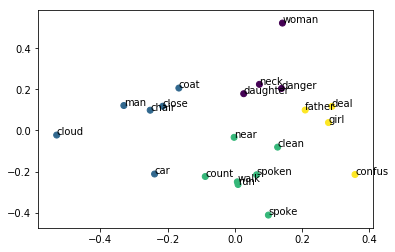

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(lle_data[:,0],lle_data[:,1], c =y_kmeans )
for i in range(len(words)-3):
    plt.annotate(words[i], xy = (lle_data[i][0],lle_data[i][1]))
plt.show()

The words get divided into four clusters  as shown by the four colors, visualize into 2D by LLE plot